# Introducción al Aprendizaje Supervisado - Regresión (Parte II)
* Regresión Polinomial
* Cross Validation
* Bias-Variance Tradeoff

## 5to año - Ingeniería en Sistemas de Información

### Facultad Regional Villa María
## Steffi Bustos

**Enunciado del Ejercicio**

Para los siguientes ejercicios vamos a usar el Boston dataset, el cual consiste en un dataset que, en base a distintos predictores, devuelve el precio de una casa en los suburbios de Boston. Tiene las siguientes características:

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
    
        Features:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        
        Target:
        - MEDV     Median value of owner-occupied homes in 1000's

Empleando algún método de separación en conjuntos de entrenamiento y test, resolver los siguientes ejercicios (extendiendo el código inicial que se muestra en la celda siguiente):

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.

2. Elegir 1 feature (entre NOX (4), RM (5), AGE (6) y DIS (7)) y entrenar un modelo de regresión polinomial tomando en cuenta cómo dicho feature predice el valor de la casa. Para efectuar la separación entre subconjuntos de entrenamiento y test, usar el random_state correspondiente.

3. En base a dicho modelo, mostrar un gráfico donde se aprecie la distancia entre los valores de $\hat{y}$ y los valores de $y$ para cada feature (estilo al gráfico de regresión lineal o el gráfico de regresión polinomial utilizado como ejemplo en este notebook).

4. Entrenar con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test. Ayuda: para graficarlo, utilizar el grado del polinomio en el eje de las $x$ y el error cuadrático medio en el eje de las $y$.

5. Especificar cuál es el grado del polinomio en el cual se minimiza el error de test.

6. Completar el código de KFolds para el modelo de regresión polinomial de grado 5, entrenarlo con el feature elegido e imprimir el error cuadrático medio, promediado entre los 10 folds. Utilizar Shuffle=true y el random_state correspondiente.

Fecha de entrega: **03/05/2017**.

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).

**Resolución**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


% matplotlib inline
#Declaro la variable random con mi número de alumno en la hoja de cálculo (4) Punto1
rng = np.random.RandomState(4)

#Punto2
#Elijo feature  AGE (6) 
boston = load_boston()
X = boston.data
y = boston.target

X_feature = X[:,6]
print(X_feature[0:30])
X = X_feature[:, np.newaxis]


[  65.2   78.9   61.1   45.8   54.2   58.7   66.6   96.1  100.    85.9
   94.3   82.9   39.    61.8   84.5   56.5   29.3   81.7   36.6   69.5
   98.1   89.2   91.7  100.    94.1   85.7   90.3   88.8   94.4   87.3]


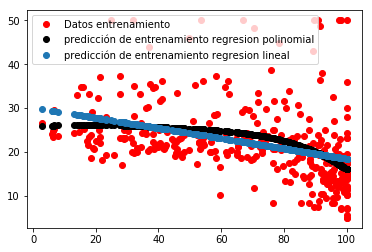

In [10]:
#Punto 3 para Datos entrenamiento
#Entreno el modelo de regresion polinomial
#Divido el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)

#Entreno el modelo en regresion lineal
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X, y, test_size=0.3, random_state=4)
regressor = LinearRegression()
regressor.fit(X_trainn, y_trainn)
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
y_pred_train = regressor.predict(X_trainn)

#Grafico datos de entrenamiento para la regresion 
plt.plot(X_train, y_train, 'o' , color= "red", label= "Datos entrenamiento ")
plt.plot(X_train, poly_regressor.predict(X_train_poly), 'o', label="predicción de entrenamiento regresion polinomial", color="black")
plt.plot(X_trainn, y_pred_train, 'o', label="predicción de entrenamiento regresion lineal")
plt.legend(loc='best')
plt.show()
    

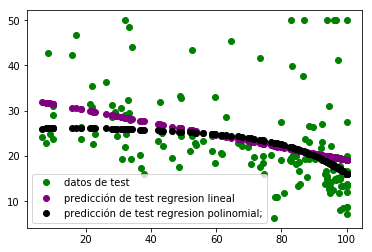

In [12]:
#Punto 3 Datos test

#Entreno el modelo de regresion polinomial
#Divido el conjunto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)


#Entreno el modelo en regresion lineal
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X, y, test_size=0.3, random_state=4)
y_pred_test = regressor.predict(X_testt)


#Grafico para test

plt.plot(X_test, y_test, 'o', label="datos de test", color="green")
plt.plot(X_testt, y_pred_test, 'o', label="predicción de test regresion lineal", color="purple")
plt.plot(X_test, poly_regressor.predict(X_test_poly), 'o',label="predicción de test regresion polinomial;", color="black")
plt.legend(loc='best')
plt.show()



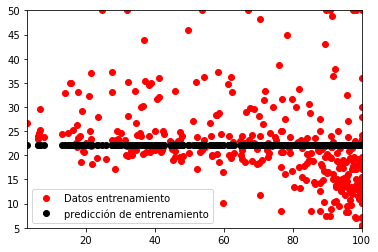

El grado del polinomio es: 1
MSE entrenamiento:  75.2708296626


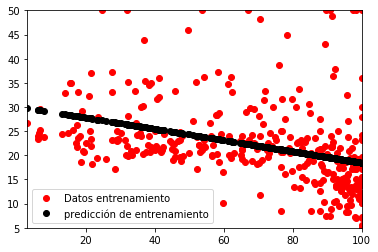

El grado del polinomio es: 2
MSE entrenamiento:  64.8778940816


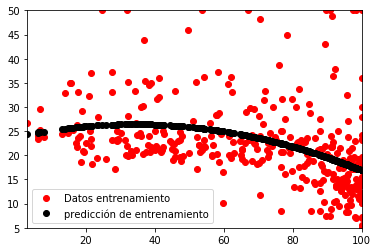

El grado del polinomio es: 3
MSE entrenamiento:  62.8562390466


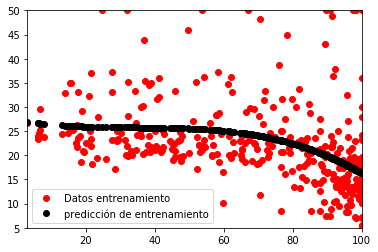

El grado del polinomio es: 4
MSE entrenamiento:  62.582926127


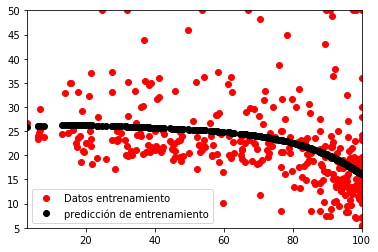

El grado del polinomio es: 5
MSE entrenamiento:  62.5457362324


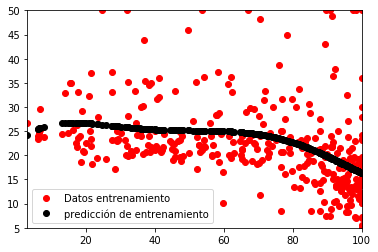

El grado del polinomio es: 6
MSE entrenamiento:  62.464815466


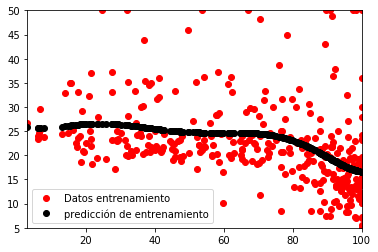

El grado del polinomio es: 7
MSE entrenamiento:  62.3806981772


In [5]:
#Punto 4, datos entrenamiento

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Dividir los datos aleatoriamente en conjuntos de entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

from sklearn.preprocessing import PolynomialFeatures

#Utilizo un ciclo while para que me grafique los polinomios de grado 1 al 7
i = 0
while i <= 6:
    #predicción con un polinomio de grado i
    poly = PolynomialFeatures(i)
    i += 1
    #Los datos de entrenamiento se adaptan al modelo y se transforman a la forma polinómica
    X_train_poly = poly.fit_transform(X_train, y_train)
    
    # Se utiliza un nuevo regresor lineal, el cual efectúa la regresión polinómica.
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    
    #Se establece limites fijos para el grafico
    axes = plt.subplot(111)
    axes.set_xlim(X.min(), X.max())
    axes.set_ylim(y.min(), y.max())
    
    #Se grafica los datos de Entrenamiento
    
    plt.plot(X_train, y_train, 'o' , color= "red", label= "Datos entrenamiento")
    plt.plot(X_train, poly_regressor.predict(X_train_poly), 'o', label="predicción de entrenamiento", color="black")
    plt.legend(loc='best')
    plt.show()
    
    print ('El grado del polinomio es:' , i)
    print('MSE entrenamiento: ',mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))

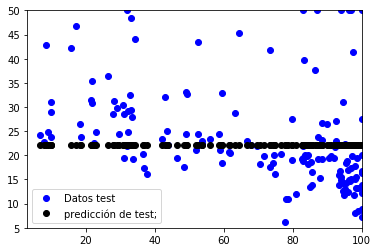

El grado del polinomio es: 1
MSE test:  106.287392907


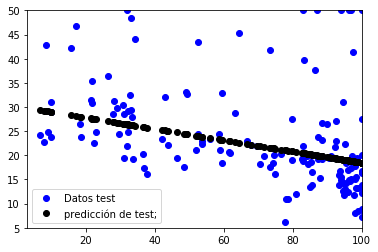

El grado del polinomio es: 2
MSE test:  90.6449332747


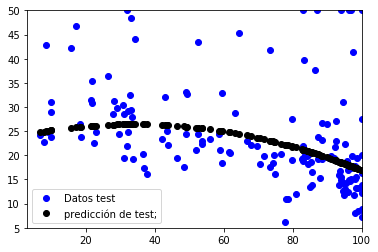

El grado del polinomio es: 3
MSE test:  92.4974922772


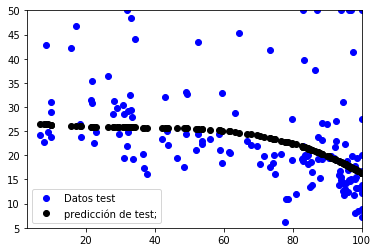

El grado del polinomio es: 4
MSE test:  92.6630886656


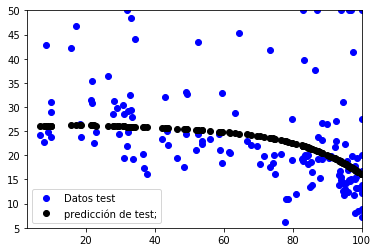

El grado del polinomio es: 5
MSE test:  92.2906392562


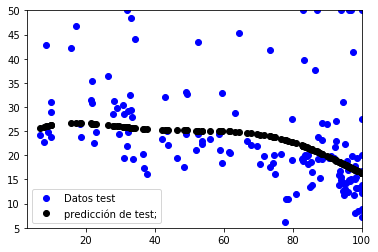

El grado del polinomio es: 6
MSE test:  92.4228273922


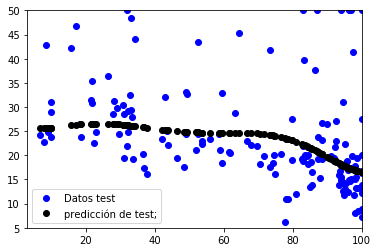

El grado del polinomio es: 7
MSE test:  93.0040795128


In [6]:
#Punto 4, datos test

from sklearn.preprocessing import PolynomialFeatures

i = 0
while i <= 6:
    #predicción con un polinomio de grado i
    poly = PolynomialFeatures(i)
    i += 1
    
    #Los datos de entrenamiento se adaptan al modelo y se transforman a la forma polinómica
    X_train_poly = poly.fit_transform(X_train, y_train)
    
    # Se utiliza un nuevo regresor lineal, el cual efectúa la regresión polinómica
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)

    # Establecemos límites fijos para el gráfico
    axes = plt.subplot(111) 
    axes.set_xlim(X.min(), X.max())
    axes.set_ylim(y.min(), y.max())

    #Los datos de test se adaptan al modelo y se transforman en forma polinomica
    X_test_poly = poly.transform(X_test)
    
    #Se grafica los datos de test
    plt.plot(X_test, y_test, 'o', label= "Datos test", color="blue" )
    plt.plot(X_test, poly_regressor.predict(X_test_poly), 'o',label="predicción de test;", color="black")
    plt.legend(loc='best')
    plt.show()

    print ('El grado del polinomio es:' , i)
    print('MSE test: ',mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

## Punto 5 
"El el grado del polinomio es:" 5
MSE test:  92.2906392562


In [8]:
from sklearn.model_selection import KFold

#Punto 6#El random_state correspondiente es 4
kf = KFold(n_splits=10, shuffle=True,random_state=4)

test_error_poly = []
ErrorTotal1=0
ErrorTotal=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Polinomio de grado 5
    poly = PolynomialFeatures(5)
    #Los datos de entrenamiento se adaptan al modelo y se transforman a la forma polinómica
    X_train_poly = poly.fit_transform(X_train, y_train)
    
    # Se utiliza un nuevo regresor lineal, el cual efectúa la regresión polinómica
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)

    #Los datos de test se adaptan al modelo y se transforman en forma polinomica
    X_test_poly = poly.transform(X_test)

    error1= mean_squared_error(y_train, poly_regressor.predict(X_train_poly))
    error2= (mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

    ErrorTotal= ErrorTotal + error2
    ErrorTotal1= ErrorTotal1 + error1
    Promedio= ErrorTotal/10
    Promedio1= ErrorTotal1/10
    
print('MSE entrenamiento promedio:', Promedio1)    
print('MSE test promedio: ', Promedio)
    

MSE entrenamiento promedio: 70.8872140216
MSE test promedio:  72.3955795419
